<a href="https://colab.research.google.com/github/ImmatureAbhirup/Book_Recommendation_System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

## Books dataset

In [ ]:
books = pd.read_csv("BX-Books.csv",sep=';', error_bad_lines=False,encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3

In [ ]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
books = books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher']]
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [ ]:
books.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)
books.head(2)

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [ ]:
books.shape

(271360, 5)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271360 non-null  object
 1   title      271360 non-null  object
 2   author     271359 non-null  object
 3   year       271360 non-null  object
 4   publisher  271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [ ]:
books.isnull().sum()

ISBN         0
title        0
author       1
year         0
publisher    2
dtype: int64

In [ ]:
books.dropna(inplace=True)
books.shape

(271357, 5)

## User Dataset

In [ ]:
user = pd.read_csv('BX-Users.csv',sep=';', error_bad_lines=False,encoding='latin-1')

In [ ]:
user.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [ ]:
user.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'},inplace=True)

In [ ]:
user.tail(2)

,user_id,location,age
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [ ]:
user.shape

(278858, 3)

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## Rating Dataset

In [ ]:
ratings = pd.read_csv("BX-Book-Ratings.csv", sep=';', error_bad_lines=False,encoding='latin-1')

In [ ]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [ ]:
ratings.rename(columns={'User-ID':'user_id','Book-Rating':'rating'},inplace=True)
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [ ]:
ratings.isnull().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

### Distribution of Rating

In [ ]:
ratings.rating.value_counts(sort=False)

0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: rating, dtype: int64

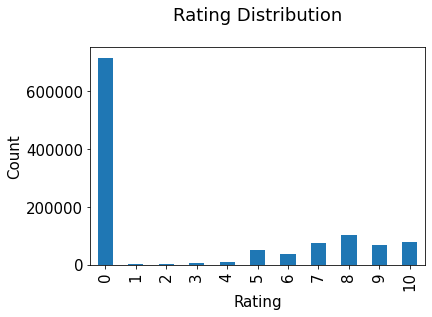

In [ ]:
plt.rc("font",size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## We'll consider those users who have given atleast more than 150 ratings.

In [ ]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
158698        1
17920         1
277135        1
275086        1
187812        1
Name: user_id, Length: 105283, dtype: int64

In [ ]:
ratings['user_id'].value_counts().shape

(105283,)

In [ ]:
x= ratings.user_id.value_counts()>150
x[x].shape

(1223,)

### user_id for these 1223 users

In [ ]:
y = x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            217318, 233711,  83109, 185771, 267033,  14638, 149690, 264525,
            138995,  41781],
           dtype='int64', length=1223)

In [ ]:
ratings = ratings[ratings['user_id'].isin(y)]

In [ ]:
ratings.shape

(582644, 3)

**So, these 1223 users have given 582644 ratings.**

## Merging the dataset

In [ ]:
ratings_with_books = ratings.merge(books,on="ISBN")

In [ ]:
ratings_with_books.shape

(539224, 7)

In [ ]:
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


### Unique Books

In [ ]:
unique_books = ratings_with_books.title.value_counts()

In [ ]:
unique_books.shape

(170109,)

So, We have 170109 books.

### Unique Authors

In [ ]:
unique_authors = ratings_with_books.author.value_counts()
unique_authors.shape

(71251,)

So, We have 71251 books.

### Unique Publishers

In [ ]:
unique_publisher = ratings_with_books.publisher.value_counts()
unique_publisher.shape

(11688,)

And, We have 11688 Publishers.

## Books with total rating

In [ ]:
book_with_number_of_ratings = ratings_with_books.groupby('title')['rating'].count().reset_index()
book_with_number_of_ratings.rename(columns={'rating':"number_of_ratings"},inplace=True)

In [ ]:
final_rating = book_with_number_of_ratings.merge(ratings_with_books,on='title')

In [ ]:
final_rating.head()

,title,number_of_ratings,user_id,ISBN,rating,author,year,publisher
0,A Light in the Storm: The Civil War Diary of ...,3,35859,0590567330,0,Karen Hesse,1999,Hyperion Books for Children
1,A Light in the Storm: The Civil War Diary of ...,3,55927,0590567330,0,Karen Hesse,1999,Hyperion Books for Children
2,A Light in the Storm: The Civil War Diary of ...,3,96448,0590567330,9,Karen Hesse,1999,Hyperion Books for Children
3,Always Have Popsicles,1,172742,0964147726,0,Rebecca Harvin,1994,Rebecca L. Harvin
4,Apple Magic (The Collector's series),1,198711,0942320093,0,Martina Boudreau,1984,Amer Cooking Guild


In [ ]:
final_rating.shape

(539224, 8)

## Filtering those books which have more than 25 ratings

In [ ]:
final_rating=final_rating[final_rating['number_of_ratings']>=25]
final_rating.shape

(137669, 8)

In [ ]:
final_rating.drop_duplicates(['user_id','title'],inplace=True)
final_rating.shape

(134528, 8)

### Finding Unique Books and Users

In [ ]:
unique_books = final_rating['title'].value_counts()
unique_books.shape

(2656,)

In [ ]:
unique_users = final_rating['user_id'].value_counts()
unique_users.shape

(1213,)

## Creating a Pivot Table

In [ ]:
user_book_pivot = final_rating.pivot_table(columns='user_id',index='title',values='rating')

In [ ]:
user_book_pivot.shape

(2656, 1213)

In [ ]:
user_book_pivot.head()

user_id,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274308,274808,275970,276018,276680,277427,277478,277639,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filling the NaN values with 0

In [ ]:
user_book_pivot.fillna(0,inplace=True)

In [ ]:
user_book_pivot.head()

user_id,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274308,274808,275970,276018,276680,277427,277478,277639,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### CSR  matrix only take non 0 values

In [ ]:
from scipy.sparse import csr_matrix
book_sparser = csr_matrix(user_book_pivot)

In [ ]:
type(book_sparser)

scipy.sparse.csr.csr_matrix

## KNN algorithm based Recommendation System :

In [ ]:
from sklearn.neighbors import NearestNeighbors
recommendation_system = NearestNeighbors(algorithm = 'brute')

In [ ]:
recommendation_system.fit(book_sparser)

NearestNeighbors(algorithm='brute')

In [ ]:
user_book_pivot.iloc[2,:]

user_id
254       9.0
1733      0.0
1903      0.0
2033      0.0
2110      0.0
         ... 
277427    0.0
277478    0.0
277639    0.0
278188    0.0
278418    0.0
Name: 1984, Length: 1213, dtype: float64

### Finding the index value of Harry Potter and the Chamber of Secrets (Book 2)

In [ ]:
np.where(user_book_pivot.index == 'Harry Potter and the Chamber of Secrets (Book 2)')[0][0]

838

## Parsing the index value in model :

In [ ]:
distances, suggestions = recommendation_system.kneighbors(user_book_pivot.iloc[838,:].values.reshape(1,-1),n_neighbors=4)

In [ ]:
distances

array([[ 0.        , 72.95889254, 73.89857915, 78.58753082]])

In [ ]:
suggestions

array([[838, 841, 839, 842]], dtype=int64)

In [ ]:
#user_book_pivot.index

### Analyzing whether our model is predicting correct or not :

In [ ]:
for books in range(len(suggestions)):
    print(user_book_pivot.index[suggestions[books]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)'],
      dtype='object', name='title')


### Creating a function

In [ ]:
def recommend_book_name(book_name):
    book_id = np.where(user_book_pivot.index == book_name)[0][0]
    distances, suggestions = recommendation_system.kneighbors(user_book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=4)
    
    
    for books in range(0,len(suggestions)):
        print ("\nBooks you can also read : \n")
        
        print(user_book_pivot.index[suggestions[books]])

In [ ]:
recommend_book_name('Animal Farm')


Books you can also read : 

Index(['Animal Farm', 'Women in His Life', 'Shoeless Joe',
       'Oscar and Lucinda'],
      dtype='object', name='title')
